# Initial Analysis of New York City Restaurant Inspection Results

### Import data obtained from [data.cityofnewyork.us](https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j):

In [1]:
import pandas as pd
nyc = pd.read_csv('DOHMH_New_York_City_Restaurant_Inspection_Results.csv', parse_dates = [8, 15, 16])

### Rename columns for convenience, and take a peek at the data:

In [2]:
nyc.columns = [
    'camis_code',
    'name',
    'borough',
    'address',      # building number
    'street',          
    'zip',
    'phone',        # phone number
    'food',         # description of cuisine
    'date',         # date of inspection
    'action',       # result of inspection: no violation, violation, closed down, re-opened, or re-closed
    'code',         # violation code
    'description',  # description of violation
    'critical',     # is the violation critical?
    'score',        # the lower the better
    'grade',        
    'grade_date',
    'record_date',
    'inspection_type'  # there are many types
]
nyc.tail(8)

,camis_code,name,borough,address,street,zip,phone,food,date,action,code,description,critical,score,grade,grade_date,record_date,inspection_type
454457,41447522,FLATBUSH LATIN GRILL,BROOKLYN,1902,CHURCH AVENUE,11226,7184622022,"Latin (Cuban, Dominican, Puerto Rican, South &...",2015-05-22,Violations were cited in the following area(s).,04M,Live roaches present in facility's food and/or...,Critical,15.0,NaN,NaT,2016-06-01,Cycle Inspection / Initial Inspection
454458,41097973,CAFE RIVIERA,BROOKLYN,830,MANHATTAN AVENUE,11222,7183838450,Bakery,2014-10-01,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2.0,A,2014-10-01,2016-06-01,Cycle Inspection / Initial Inspection
454459,41406223,DAMAS FALAFEL HOUSE,BROOKLYN,407,MYRTLE AVENUE,11205,7188526677,Middle Eastern,2013-03-05,Violations were cited in the following area(s).,02C,Hot food item that has been cooked and refrige...,Critical,12.0,A,2013-03-05,2016-06-01,Cycle Inspection / Initial Inspection
454460,41529889,BROOKLYN COMMUNE,BROOKLYN,601,GREENWOOD AVENUE,11218,7186861044,Sandwiches/Salads/Mixed Buffet,2015-08-24,Violations were cited in the following area(s).,10B,Plumbing not properly installed or maintained;...,Not Critical,23.0,NaN,NaT,2016-06-01,Cycle Inspection / Initial Inspection
454461,40867812,RUBENS PIZZERIA-EL POLLO PERUVIAN CUISINE,BROOKLYN,1533,70 STREET,11228,7183318821,Pizza,2013-02-21,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,18.0,NaN,NaT,2016-06-01,Cycle Inspection / Initial Inspection
454462,50011601,ROCKAWAY DELI & RESTAURANT,QUEENS,15802,ROCKAWAY BLVD,11434,3474264335,Chinese,2016-04-11,Violations were cited in the following area(s).,10H,Proper sanitization not provided for utensil w...,Not Critical,13.0,A,2016-04-11,2016-06-01,Cycle Inspection / Re-inspection
454463,41022989,MULBERRY STREET BAR,MANHATTAN,176 12,MULBERRY STREET,10013,2122269345,Italian,2013-05-20,Violations were cited in the following area(s).,10J,''''Wash hands sign not posted at hand wash f...,Not Critical,7.0,A,2013-05-20,2016-06-01,Cycle Inspection / Initial Inspection
454464,50003808,CROCUS,BROOKLYN,328,TOMPKINS AVE,11216,7186222426,CafÃ©/Coffee/Tea,2015-08-20,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,20.0,NaN,NaT,2016-06-01,Cycle Inspection / Initial Inspection


### Keep track of the day of the week (inspections are rare on Saturdays, and very rare on Sundays):

In [3]:
nyc['weekday'] = nyc.date.dt.dayofweek
nyc.weekday.value_counts()

2    103202
3     99360
1     94358
0     73369
4     59865
5     22886
6      1425
Name: weekday, dtype: int64

### Build a mapping from codes to descriptions:

In [4]:
pd.set_option('display.max_colwidth',99999)
pd.set_option('display.max_rows', 100)
table = nyc.groupby(['code','description']).count()[['name']].reset_index('description').rename(columns = {'name':'count'})
table

,description,count
code,,
02A,Food not cooked to required minimum temperature.,393
02B,Hot food item not held at or above 140Âº F.,21795
02C,Hot food item that has been cooked and refrigerated is being held for service without first being reheated to 1 65Âº F or above within 2 hours.,519
02D,"Precooked potentially hazardous food from commercial food processing establishment that is supposed to be heated, but is not heated to 140Âº F within 2 hours.",34
02E,"Whole frozen poultry or poultry breasts, other than a single portion, is being cooked frozen or partially thawed.",3
02F,"Meat, fish or molluscan shellfish served raw or undercooked without prior notification to customer.",11
02G,Cold food item held above 41Âº F (smoked fish and reduced oxygen packaged foods above 38 ÂºF) except during necessary preparation.,35634
02H,"Food not cooled by an approved method whereby the internal product temperature is reduced from 140Âº F to 70Âº F or less within 2 hours, and from 70Âº F to 41Âº F or less within 4 additional hours.",4303
02I,Food prepared from ingredients at ambient temperature not cooled to 41Âº F or below within 4 hours.,90


### Codes related to rodents:

In [5]:
table[(table.description.str.contains('rats')) | (table.description.str.contains('mice'))]

,description,count
code,,
04K,Evidence of rats or live rats present in facility's food and/or non-food areas.,2971
04L,Evidence of mice or live mice present in facility's food and/or non-food areas.,31931


In [6]:
pd.reset_option('display.max_colwidth')
pd.reset_option('display.max_rows')

### This data set lacks latitude & longitude information, but those can be derived from the provided addresses via the [Google Maps Geocoding API](https://developers.google.com/maps/documentation/geocoding/start). For this, we can create a column of searchable addresses:

In [7]:
# If there is a building number, use it and the street name:
nyc.loc[nyc.address.notnull(), 'search_address'] = (
    nyc[nyc.address.notnull()]['address'] + ' ' + 
    nyc[nyc.address.notnull()]['street'] + 
    ', New York City ' + nyc[nyc.address.notnull()]['zip'].astype(str))

# If there is no building number, use the business name and the street name:
nyc.loc[nyc.address.isnull(), 'search_address'] = (
    nyc[nyc.address.isnull()]['name'] + ' ' + 
    nyc[nyc.address.isnull()]['street'] + 
    ', New York City ' + nyc[nyc.address.isnull()]['zip'].astype(str))

nyc[['name','address','street','search_address']]

,name,address,street,search_address
0,CIBAR - LADY MENDL'S TEA SALON,56,IRVING PLACE,"56 IRVING PLACE, New York City 10003"
1,JUN-MEN RAMEN BAR,249,9TH AVE,"249 9TH AVE, New York City 10001"
2,MAD RIVER BAR & GRILLE,1442,3 AVENUE,"1442 3 AVENUE, New York City 10028"
3,EL BUEN AMBIENTE #2,1824,WESTCHESTER AVENUE,"1824 WESTCHESTER AVENUE, New York City 10472"
4,CO BA RESTAURANT,110,9TH AVE,"110 9TH AVE, New York City 10011"
5,JUNIOR'S FRESH KITCHEN,52,MERCER STREET,"52 MERCER STREET, New York City 10013"
6,HANJAN,36,WEST 26 STREET,"36 WEST 26 STREET, New York City 10010"
7,ROCCO'S BRICK OVEN PIZZERIA,79-16,21 AVENUE,"79-16 21 AVENUE, New York City 11370"
8,TEA MAGIC,4017,MAIN ST,"4017 MAIN ST, New York City 11354"
9,MATEUS RESTAURANT,22205,JAMAICA AVENUE,"22205 JAMAICA AVENUE, New York City 11428"


### The total number of *unique* addresses is well within the "Standard Usage Limits" of the Geocoding API:

In [8]:
len(nyc.search_address.unique())

23542

---

# Initial Analysis of Rat Sightings

### Import parts of the data obtained from [data.cityofnewyork.us](https://data.cityofnewyork.us/Social-Services/Rat-Sightings/3q43-55fe):

In [9]:
rats = pd.read_csv('Rat_Sightings.csv', 
                  parse_dates = [
                             'Created Date', 
                             'Closed Date', 
                             'Due Date'
                            ],
                  usecols = [
                             'Unique Key', 
                             'Created Date', 
                             'Closed Date', 
                             'Status', 
                             'Due Date',
                             'Latitude',
                             'Longitude'
                            ]
                  )
rats.columns = [
                             'key', 
                             'created', 
                             'closed', 
                             'status', 
                             'due',
                             'latitude',
                             'longitude'
                ]
rats

,key,created,closed,status,due,latitude,longitude
0,19630347,2011-01-19 00:00:00,2011-02-17 00:00:00,Closed,2011-02-18 23:53:24,NaN,NaN
1,19621101,2011-01-18 00:00:00,2011-02-16 00:00:00,Closed,2011-02-17 13:00:10,40.703854,-73.941482
2,19619853,2011-01-18 00:00:00,2011-03-21 00:00:00,Closed,2011-02-17 23:05:59,40.701102,-73.920026
3,30941339,2015-06-26 22:55:40,NaT,Pending,2015-07-26 22:55:40,40.759365,-73.963365
4,32250399,2015-12-21 00:00:00,2015-12-24 00:00:00,Closed,2016-01-20 19:11:13,40.822394,-73.907252
5,30877306,2015-06-18 00:00:00,2015-06-23 00:00:00,Closed,2015-07-18 22:14:11,40.875794,-73.874120
6,19676403,2011-01-25 00:00:00,2011-02-22 00:00:00,Closed,2011-02-24 17:23:37,40.684580,-73.958229
7,28563358,2014-07-27 00:00:00,2014-08-01 12:42:45,Closed,2014-08-26 22:11:36,40.817978,-73.888775
8,31008256,2015-07-05 20:47:50,NaT,Pending,2015-08-04 20:47:50,40.745195,-73.910701
9,31000555,2015-07-04 16:23:07,NaT,Pending,2015-08-03 16:23:07,40.669726,-73.922806


### Geographical distribution of rat sightings this year, with points scaled by length of time to close each case:

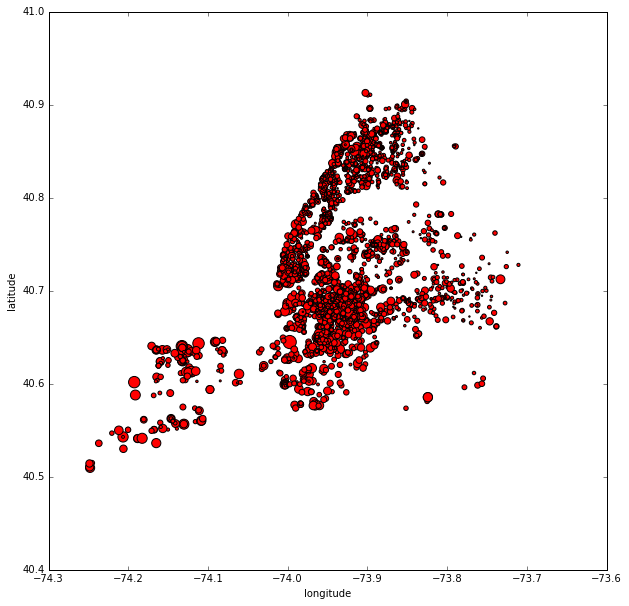

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
recent = rats[rats.created >= '2016-01-01 00:00:00'].sort_values('created')
recent.plot(x='longitude', y='latitude', kind='scatter', s = (recent.closed - recent.created).dt.days*2, c = 'red')